#### Conceito Importante: Regressão vs. Classificação

🇧🇷 PT: No Titanic, fizemos Classificação (o alvo era uma categoria: 0 ou 1). Aqui, faremos Regressão (o alvo é um número contínuo: preço em Dólares). Isso muda os algoritmos que vamos usar.

🇺🇸 EN: In Titanic, we performed Classification (the target was a category: 0 or 1). Here, we will perform Regression (the target is a continuous number: price in Dollars). This changes the algorithms we will use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🇧🇷 Configuração de estilo dos gráficos
# 🇺🇸 Plot styling configuration
sns.set_style('darkgrid')

# 🇧🇷 Carregar os dados de treino
# 🇺🇸 Load training data
df = pd.read_csv('train.csv')

# 🇧🇷 Visualizar as primeiras linhas e todas as colunas
# 🇺🇸 Display the first rows and all columns
# (pandas setup to show all columns, since we have 81!)
pd.set_option('display.max_columns', None)
display(df.head())

# 🇧🇷 Verificar o tamanho do dataset
# 🇺🇸 Check dataset shape
print(f"Shape: {df.shape}")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Shape: (1460, 81)


## Checando dados invisíveis (valores ausentes)
Valores ausentes são aqueles que não tem valor, ou mesmo não existem nessas casas, por exemplo: piscinas, cercas, etc.

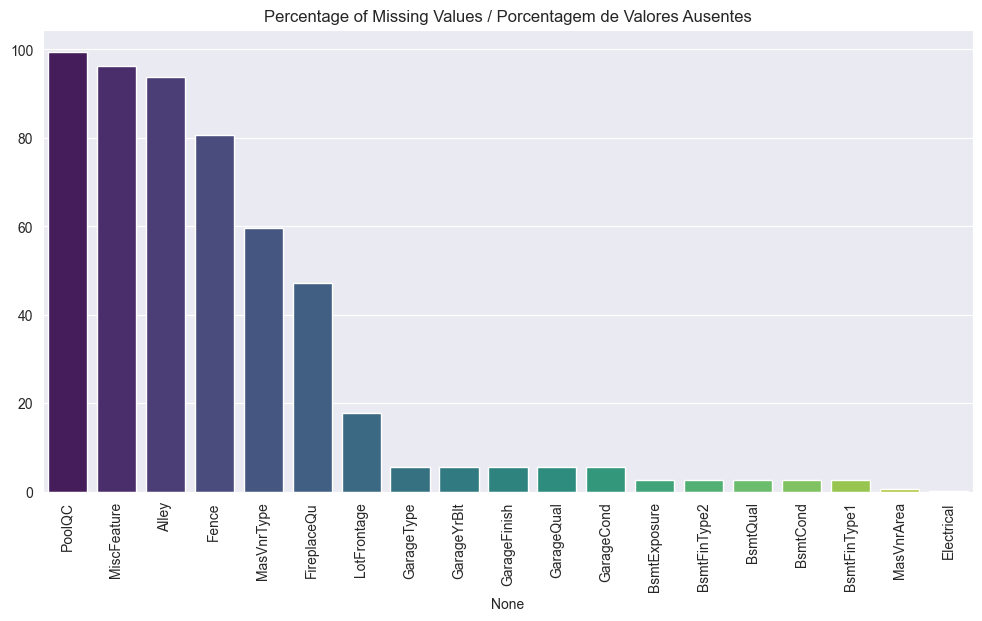

In [3]:
# 🇧🇷 Calcular a porcentagem de valores nulos
# 🇺🇸 Calculate percentage of null values
missing = df.isnull().sum()
missing = missing[missing > 0] # 🇧🇷 Pegar apenas os que tem erro / 🇺🇸 Get only those with errors
missing_percent = (missing / len(df)) * 100

# 🇧🇷 Ordenar do maior para o menor
# 🇺🇸 Sort from highest to lowest
missing_percent.sort_values(ascending=False, inplace=True)

# 🇧🇷 Plotar um gráfico de barras para visualizar
# 🇺🇸 Plot a bar chart to visualize
plt.figure(figsize=(12, 6))

# Fix: Added hue=missing_percent.index and legend=False
sns.barplot(x=missing_percent.index,
            y=missing_percent.values,
            hue=missing_percent.index,
            legend=False,
            palette='viridis')

plt.xticks(rotation=90)
plt.title('Percentage of Missing Values / Porcentagem de Valores Ausentes')
plt.show()